In [1405]:
import matplotlib.pyplot as plt
import numpy as np

Equally spaced or random uniform initial positions

Velocities can be drawn from well defined values $\{−v_0, 0, +v_0\}$ or from a gaussian Maxwell velocity distributions.

Situation where the numbers of $A$ and $\overline A$ are exactly the same or not

In [1406]:
n = 4 # number of particles
r = 0.5 # ratio of particles over anti-particles
n_p = int(n*r)
n_a = n - n_p

L = 1 # box size
v0 = 1 # particles initial velocity

N = 500 # number of time steps
dt = 1/600 # time step interval

# Place particles at even intervals along the axis
x = np.zeros((N, n))
x[0] = L*np.linspace(0.2, 0.8, n)
# Fill the rest with NaNs, to avoid plotting values that haven't
# been calculated
x[1:, :] = np.nan 
# Randomly assign `n_p` particle and `n_a` anti-particle states,
# respectively labeled with 1 and -1
particles = np.concatenate((-1*np.ones(n_p), np.ones(n_a)))
np.random.shuffle(particles)

# Give random initial velocities to the particles: either -v0, 0
# or v0.
v = np.array([-v0 if v <= v0*1/3
     else 0 if v <= v0*2/3
     else v0 
     for v in v0*np.random.rand(n)])
# v = np.concatenate((v0*np.ones(n_p), -v0*np.ones(n_a)))
# np.random.shuffle(v)

Compute positions $x_j(iδt)$ for a discrete sequence of time values $iδt$.
Particles are put back in the interval $[0, L]$ whenever they escape.

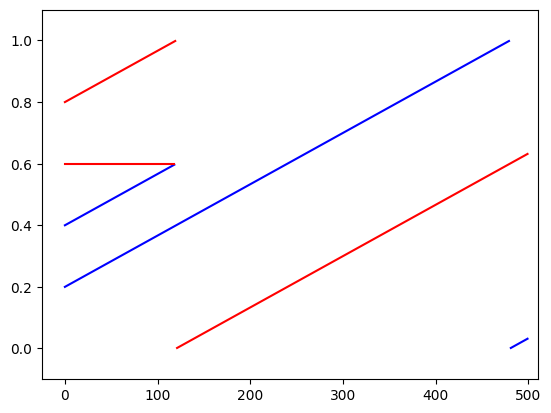

In [1408]:
annihilated = []
wrapped = []

for t in range(N-1):
    for i in range(n):
        # Skip particles that have already been annihilated
        if i in annihilated:
            continue

        # Bounds checking: wrap particles around [0, L]
        if x[t, i] >= L:
            x[t, i] -= L
            wrapped.append((t, i))
        elif x[t, i] < 0:
            x[t, i] += L
            wrapped.append((t, i))

        # Collision checking: if the distance between two particles
        # changes sign between t and t+dt, then they must have
        # collided.
        for j in range(i):
            dx0 = x[t, i] - x[t, j]
            dx1 = x[t+1, i] - x[t+1, j]

            # If one is a particle and the other is an anti-particle,
            # then they annihilate each other; else, they bounce off
            # each other in an elastic fashion.
            if abs(dx0) < 0.1 and dx0*dx1 < 0:
                if particles[i] == -particles[j]:
                    # NaN values are not shown by matplotlib, so
                    # a particle and anti-particle tracks stop
                    # after their collision
                    x[t, i] = x[t, j] = np.nan
                    annihilated.append(i)
                    annihilated.append(j)
                else:
                    # Boucing off means that velocities are
                    # reversed for both particles
                    v[i] *= -1; v[j] *= -1

        # Move all particles by one step
        x[t + 1] = x[t] + v*dt

# Avoid plotting lines between wrapped values
for (t, i) in wrapped:
    x[t, i] = np.nan

# Plot the trajectories of all particles
for i, p in enumerate(particles):
    plt.plot(range(N), x[:, i], color = 'b' if p == 1 else 'r')

plt.xlim(-N/20, N+10)
plt.ylim(-0.1, L+0.1)
plt.show()